# <center>**IROS**<center>

**Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import mbloodmoon as bm
from dummymoon import image_plot

**Initialization**

In [ ]:
root_path = "/mnt/d/PhD_AASS/Coding/Images_fits/"
mask_file = root_path + "wfm_mask.fits"
simul_data = root_path + "iros_simulation_cam_id00/"

filepaths = bm.simulation_files(simul_data)   # fixed bm.io: >>> search for *detected*.fits
pprint(filepaths)

{'cam1a': {'detected': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1a/id00_cam1a_run0_detected_plane.fits'),
           'reconstructed': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1a/id00_cam1a_run0_reconstructed.fits'),
           'sources': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1a/id00_cam1a_run0_sources.fits')},
 'cam1b': {'detected': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1b/id00_cam1b_run0_detected_plane.fits'),
           'reconstructed': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1b/id00_cam1b_run0_reconstructed.fits'),
           'sources': PosixPath('/mnt/d/PhD_AASS/Coding/Images_fits/iros_simulation_cam_id00/cam1b/id00_cam1b_run0_sources.fits')}}


In [3]:
cam = "cam1a"
data_file = "id00_cam1a_run0_reconstructed.fits"

wfm = bm.codedmask(mask_file)
sdl = bm.simulation(simul_data + cam + "/" + data_file)

pprint(sdl.pointings)
pprint(sdl.rotations)

{'x': CoordEquatorial(ra=0.0, dec=45.0),
 'z': CoordEquatorial(ra=180.0, dec=45.0)}
{'x': CoordHorizontal(az=0.0, al=0.0), 'z': CoordHorizontal(az=0.0, al=90.0)}


**Detector and Sky Reconstruction Image**

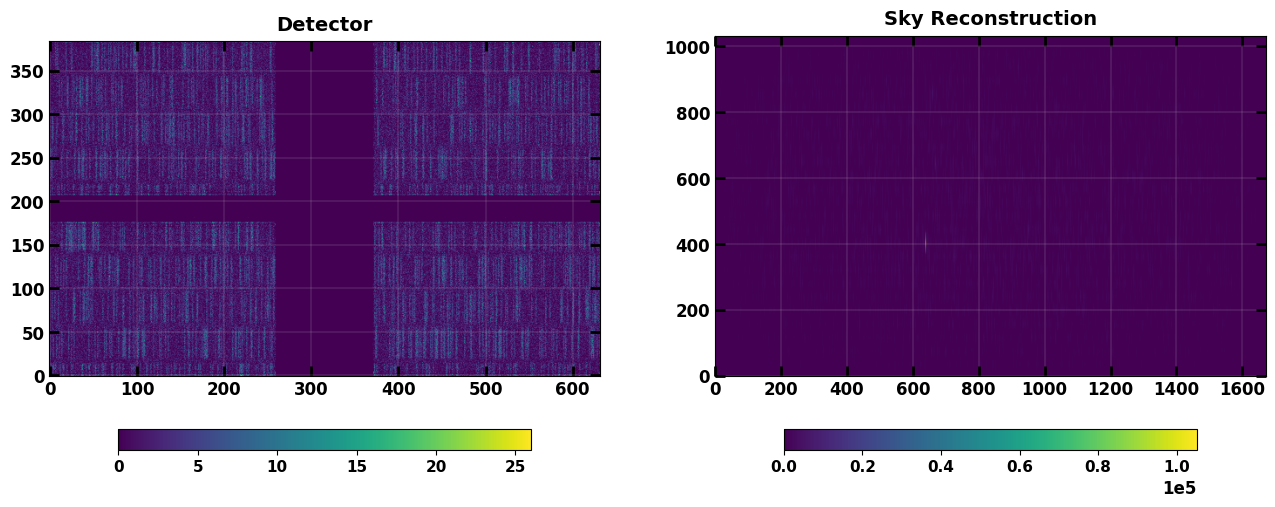

In [4]:
detector, _ = bm.count(wfm, sdl.data)
skyrec = bm.decode(wfm, detector)

image_plot([detector, skyrec],
           ["Detector", "Sky Reconstruction"],
           cbarlimits=[(None, None), (0, None)])

**Variance and SNR**

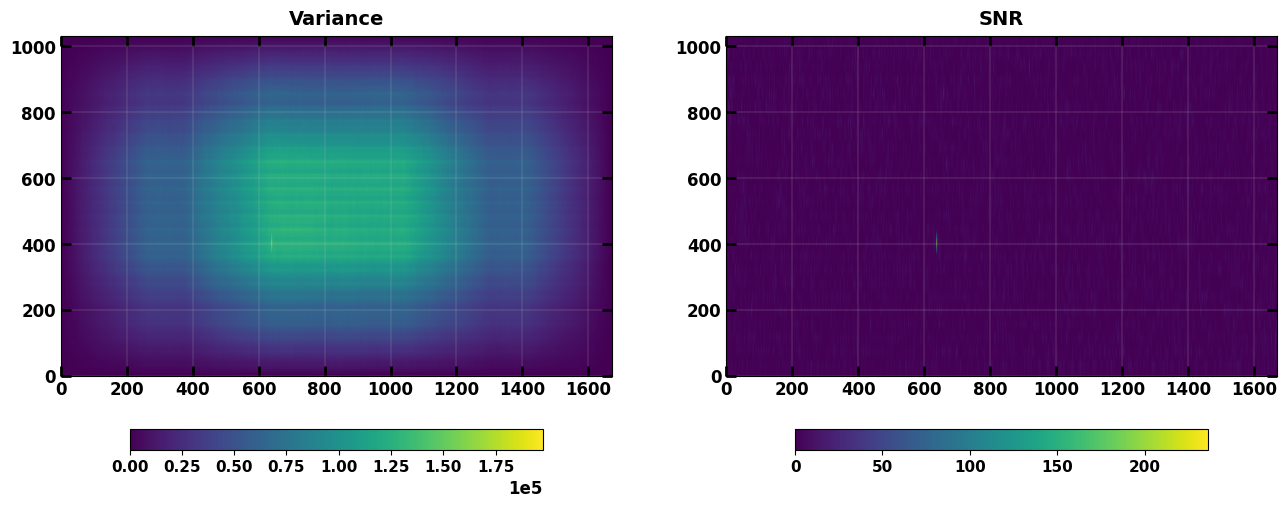

In [5]:
skyvar = bm.variance(wfm, detector)
skysnr = bm.snratio(skyrec, skyvar)

image_plot([skyvar, skysnr],
           ["Variance", "SNR"],
           cbarlimits=[(None, None), (0, None)])

**Composed Cameras**

- Here the Upscaling is needed to ensure the correct superposition of the two cameras:

In [7]:
from mbloodmoon.images import upscale, compose

root_path = "/mnt/d/PhD_AASS/Coding/Images_fits/"
mask_file = root_path + "wfm_mask.fits"
simul_data = root_path + "iros_simulation_cam_id00/"
filepaths = bm.simulation_files(simul_data)


wfm = bm.codedmask(mask_file, upscale_x=5)   

sdl_1a = bm.simulation(filepaths["cam1a"]["reconstructed"])
detector_1a, _ = bm.count(wfm, sdl_1a.data)
skyrec_1a = bm.decode(wfm, detector_1a)

# repeat for the second camera
sdl_1b = bm.simulation(filepaths["cam1b"]["reconstructed"])
detector_1b, _ = bm.count(wfm, sdl_1b.data)
skyrec_1b = bm.decode(wfm, detector_1b)

sky_a = upscale(skyrec_1a, upscale_y=8)
sky_b = upscale(skyrec_1b, upscale_y=8)
sky_composed, _ = compose(sky_a, sky_b, strict=False)

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 9))
for ax, b, bmax, title in zip(
        axs,
        [sky_a, sky_b],
        [bm.images.argmax(sky_a), bm.images.argmax(sky_b)],
        ["SkyRec Cam1A", "SkyRec Cam1B"],
):
    c0 = ax.imshow(b, vmin=0, vmax=-b.min())
    ax.scatter(bmax[1], bmax[0], facecolors='none', edgecolors='white', alpha=0.5)
    ax.set_title(title, fontsize=14, pad=8, fontweight='bold')
plt.show()

: 

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(sky_composed)
plt.show()

: 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import mbloodmoon as bm
from mbloodmoon.images import upscale, compose

#plt.ion()
matplotlib.use('agg')

if __name__ == '__main__':

    root_path = "/mnt/d/PhD_AASS/Coding/Images_fits/"
    mask_file = root_path + "wfm_mask.fits"
    simul_data = root_path + "iros_simulation_cam_id00/"

    filepaths = bm.simulation_files(simul_data)   # fixed bm.io: >>> search for *detected*.fits


    wfm = bm.codedmask(mask_file, upscale_x=5)   

    sdl_1a = bm.simulation(filepaths["cam1a"]["reconstructed"])
    detector_1a, _ = bm.count(wfm, sdl_1a.data)
    skyrec_1a = bm.decode(wfm, detector_1a)

    # repeat for the second camera
    sdl_1b = bm.simulation(filepaths["cam1b"]["reconstructed"])
    detector_1b, _ = bm.count(wfm, sdl_1b.data)
    skyrec_1b = bm.decode(wfm, detector_1b)

    sky_a = upscale(skyrec_1a, upscale_y=8)
    sky_b = upscale(skyrec_1b, upscale_y=8)
    sky_composed, _ = compose(sky_a, sky_b, strict=False)

    if input("first img? ").lower() == 'y':
        fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
        plt.tight_layout()
        for ax, b, bmax, title in zip(
                axs,
                [sky_a, sky_b],
                [bm.images.argmax(sky_a), bm.images.argmax(sky_b)],
                ["SkyRec Cam1A", "SkyRec Cam1B"],
        ):
            c0 = ax.imshow(b, vmin=0, vmax=-b.min())
            ax.scatter(bmax[1], bmax[0], facecolors='none', edgecolors='white', alpha=0.5)
            ax.set_title(title, fontsize=14, pad=8, fontweight='bold')
        plt.savefig(root_path + 'cams.png')
        plt.close()

    if input("second img? ").lower() == 'y':
        fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=100)
        plt.tight_layout()
        ax.imshow(sky_composed)
        plt.savefig(root_path + 'composed.png')
        plt.close()